Praktikum 5

In [ ]:
import os
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("retail_sales_dataset.csv")
data.head(10)


Saving retail_sales_dataset.csv to retail_sales_dataset (2).csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [ ]:
women_df = data[data['Gender'] == 'Female']
men_df = data[data['Gender'] == 'Male']

men_amount_mean = men_df['Total Amount'].mean()
men_amount_median = men_df['Total Amount'].median()
women_amount_mean = women_df['Total Amount'].mean()
women_amount_median = women_df['Total Amount'].median()

print(f"Men mean amount: {men_amount_mean}\t Median: {men_amount_median}")
print(f"Women mean amount: {women_amount_mean}\t Median: {women_amount_median}")
print(f"Difference between Mean: {abs(men_amount_mean-women_amount_mean)}\t Median: {abs(men_amount_median-women_amount_median)}")


Men mean amount: 455.42857142857144	 Median: 120.0
Women mean amount: 456.54901960784315	 Median: 150.0
Difference between Mean: 1.1204481792717047	 Median: 30.0


In [3]:
age_amount_per_year_men = pd.DataFrame(men_df.groupby(['Age'])['Total Amount'].mean()).reset_index()
age_amount_per_year_women = pd.DataFrame(women_df.groupby(['Age'])['Total Amount'].mean()).reset_index()
age_amount_per_year_diff = pd.DataFrame({
    'Age': age_amount_per_year_men['Age'],
    "Total Amount": abs(age_amount_per_year_men['Total Amount'] - age_amount_per_year_women['Total Amount'])
})


figure, ax = plt.subplots(3, 1, figsize=(15, 15))
sns.barplot(data=age_amount_per_year_men, x='Age', y='Total Amount', ax=ax[0], color='blue')
ax[0].set_title('Average Spending by Age - Men', fontsize=14)
ax[0].set_ylabel('Amount ($)')
ax[0].grid(alpha=0.3)
sns.barplot(data=age_amount_per_year_women, x='Age', y='Total Amount', ax=ax[1], color='pink')
ax[1].set_title('Average Spending by Age - Women', fontsize=14)
ax[1].set_ylabel('Amount ($)')
ax[1].grid(alpha=0.3)
sns.barplot(data=age_amount_per_year_diff, x='Age', y='Total Amount', ax=ax[2], color='purple')
ax[2].set_title('Absolute Difference in Spending Between Genders', fontsize=14)
ax[2].set_ylabel('Amount Difference ($)')
ax[2].grid(alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

<Axes: title={'center': 'Popularity of Product Categories Based on Transaction'}, xlabel='Product Category'>

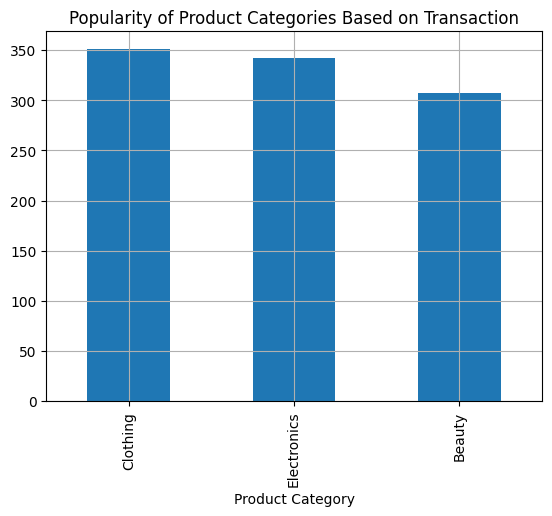

In [ ]:
data["Product Category"].value_counts().plot(kind="bar",
                                             grid=True,
                                             title='Popularity of Product Categories Based on Transaction',)